Objective: to predict the default of credit card

The training data set includes a binary variable, default payment (Yes = 1, No = 0), as the target variable, and the following 23 variables as the features variables:

X1: Amount of the given credit: it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement. X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment. X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
data file: week12.csv

Actions
Based on the given training data set

describe the problem
design and document the roadmap
data preprocessing
learning
evaluation (20% data as test set)
prediction
conclusion and discussion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report # Added this. Shows accuracy, recall and precision.


col_names=["id",
           "amt_given_credit",  # amount of given credit
           "gender",            # 1=male; 2=female
           "education",         # 1=grad school; 2=uni; 3=high school; 4=others
           "marital",           # 1=married; 2=single; 3=others
           "age",               # age

           # histories of past payments
           # -1=pay duly; 1=payment delay one month; 2=payment delay two months
           # ... 8=payment delay eight months; 9=payment delay nine months+
           "hist_sept", "hist_august", "hist_july",
           "hist_june", "hist_may", "hist_april",

           # amount of billing statements
           "billed_sept", "billed_august", "billed_july",
           "billed_june", "billed_may", "billed_april",

           # amount of previous payment
           "prev_sept", "prev_august", "prev_july",
           "prev_june", "prev_may", "prev_april",

           # default payment; 1=yes; 2=no
           "is_default"]
data = pd.read_csv('https://raw.githubusercontent.com/norman02/Team-Awesome/master/week12.csv', header=0, names=col_names)



## Data

In [2]:
data.head()

,id,amt_given_credit,gender,education,marital,age,hist_sept,hist_august,hist_july,hist_june,...,billed_june,billed_may,billed_april,prev_sept,prev_august,prev_july,prev_june,prev_may,prev_april,is_default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
print("Number of rows:", data.shape[0])
print ("Number of columns :",data.shape[1])

Number of rows: 30000
Number of columns : 25


In [4]:
print ("data info  :",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id                  30000 non-null int64
amt_given_credit    30000 non-null int64
gender              30000 non-null int64
education           30000 non-null int64
marital             30000 non-null int64
age                 30000 non-null int64
hist_sept           30000 non-null int64
hist_august         30000 non-null int64
hist_july           30000 non-null int64
hist_june           30000 non-null int64
hist_may            30000 non-null int64
hist_april          30000 non-null int64
billed_sept         30000 non-null int64
billed_august       30000 non-null int64
billed_july         30000 non-null int64
billed_june         30000 non-null int64
billed_may          30000 non-null int64
billed_april        30000 non-null int64
prev_sept           30000 non-null int64
prev_august         30000 non-null int64
prev_july           30000 non-null int64
prev_june           30000 non-

In [5]:
print (data.isnull().sum())

id                  0
amt_given_credit    0
gender              0
education           0
marital             0
age                 0
hist_sept           0
hist_august         0
hist_july           0
hist_june           0
hist_may            0
hist_april          0
billed_sept         0
billed_august       0
billed_july         0
billed_june         0
billed_may          0
billed_april        0
prev_sept           0
prev_august         0
prev_july           0
prev_june           0
prev_may            0
prev_april          0
is_default          0
dtype: int64


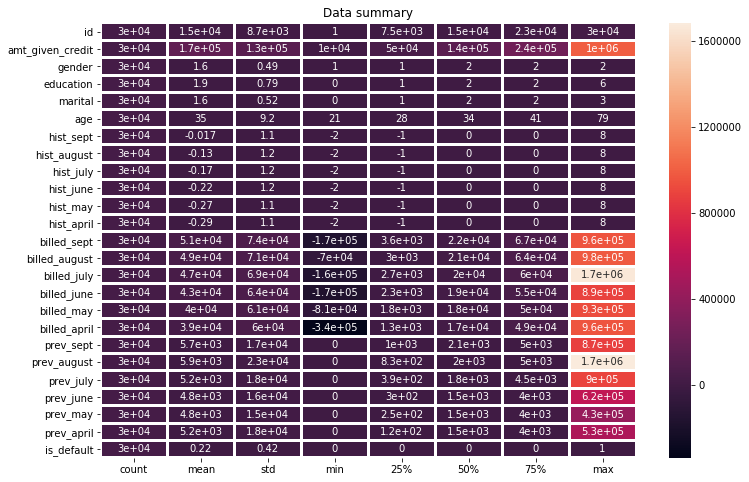

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(data.describe().transpose(),
            annot=True,linecolor="w",
            linewidth=2,
            #cmap=sns.color_palette()
           )
plt.title("Data summary")
plt.show()

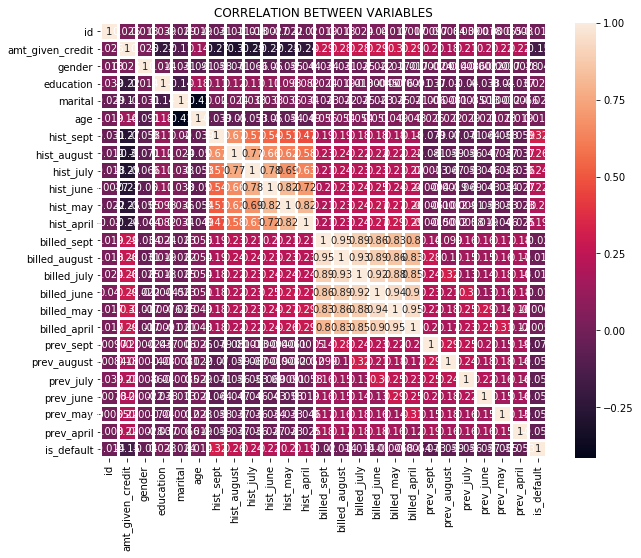

In [7]:
correlation = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            #cmap=sns.color_palette('magma'),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

[0.06611669 0.01056604 0.03206449 0.0225996  0.06676825 0.09408703
 0.05090777 0.03429156 0.03319807 0.02706489 0.02842345 0.05031767
 0.04643152 0.04528281 0.04492396 0.04385477 0.04476311 0.04426199
 0.04240311 0.04183032 0.04119004 0.04238992 0.04626293]


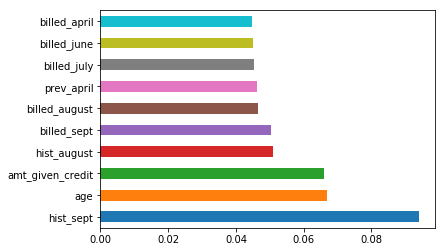

In [8]:
X_data = data.iloc[:,1:-1] #indpendent columns
y_data = data.iloc[:,-1]   #target column

model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_data,y_data)
print(model.feature_importances_)


feat_importances = pd.Series(model.feature_importances_, index=X_data.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [16]:

X = data[['hist_sept', 
         # 'age', 
         # 'amt_given_credit'
         ]]
y = data['is_default']


In [17]:

X_train, X_test, y_train, y_test = train_test_split(
        X,y,
        test_size = 0.2,
        random_state=1,
        stratify=y)


## SVC


In [18]:
from sklearn.svm import SVC

svc = SVC(cache_size=1000)
svc.fit(X_train, y_train)
y_svc_pred = svc.predict(X_test)
print(svc.score(X_test, y_test))

0.8176666666666667


## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report # Added this. Shows accuracy, recall and precision.

# I'm thinking random forest is our best bet

pipeline = make_pipeline(StandardScaler(),
                        RandomForestClassifier(n_estimators=100, criterion='gini'))

param_grid = [{'randomforestclassifier__n_estimators': [70, 75, 80, 85, 90, 95, 100]}]
gs = GridSearchCV(estimator=pipeline,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10, n_jobs=2)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.819875
{'randomforestclassifier__n_estimators': 80}


## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
log_reg = LogisticRegression();
log_reg.fit(X_train, y_train)
y_log_reg_train_pred = log_reg.predict(X_train)
y_log_reg_test_pred = log_reg.predict(X_test)

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_log_reg_train_pred),
        r2_score(y_test, y_log_reg_test_pred)))

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_log_reg_train_pred),
        mean_squared_error(y_test, y_log_reg_test_pred)))
print ("Accuracy Score: ", accuracy_score(y_test, y_log_reg_test_pred))

R^2 train: -0.045, test: -0.055
MSE train: 0.180, test: 0.182
Accuracy Score:  0.8183333333333334


## KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn =  KNeighborsClassifier()


param_grid = {'n_neighbors': np.arange(1,10),
             'metric':['euclidean', 'minkowski'],
             'algorithm':['ball_tree', 'kd_tree', 'brute']}

gs = GridSearchCV(estimator=knn,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=5, 
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8199583333333333
{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 7}


## Naive Bayyes 

In [ ]:
from sklean.naive_bayes import GaussianNB



LR: 0.819917 (0.007566)
LDA: 0.819917 (0.007566)
KNN: 0.804708 (0.022666)
CART: 0.819833 (0.007911)
NB: 0.819917 (0.007566)
SVM: 0.819583 (0.007601)


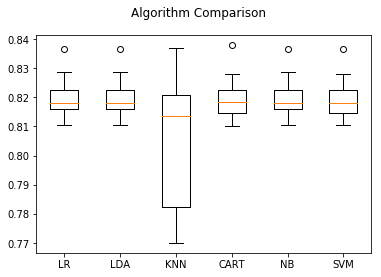

In [22]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

X = X_train
Y = y_train
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()